In [434]:
from elasticsearch import Elasticsearch
import tensorflow as tf
from tensorflow import keras
import keras
import re
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import string
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Softmax
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import asarray
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from numpy import zeros
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer # Used for stemming
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Loss function being used


[nltk_data] Downloading package stopwords to /home/spetz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/spetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [435]:
csv  = pd.read_csv("final_cluster.csv")
csv = csv[['cluster' , 'uid' ,'location','age' , 'isbn' ,'book_title' ,'book_author','summary','rating']]

csv

,cluster,uid,location,age,isbn,book_title,book_author,summary,rating
0,0,19,"weston, ,",14.0,0375759778,Prague : A Novel,ARTHUR PHILLIPS,Five American expatriates living in Budapest i...,7
1,0,51,"renton, washington, usa",34.0,0440225701,The Street Lawyer,JOHN GRISHAM,"After a violent encounter with a homeless man,...",9
2,0,75,"long beach, california, usa",37.0,1558531025,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,A collection of advice on how to live a happy ...,5
3,0,125,"lansing, michigan, usa",49.0,0679429220,Midnight in the Garden of Good and Evil: A Sav...,John Berendt,"In charming, beautiful, and wealthy old-South ...",10
4,0,178,"rexford, new york, usa",28.0,0451410319,Hush,Anne Frasier,Sixteen years after her own son fell victim to...,6
...,...,...,...,...,...,...,...,...,...
22575,1,278542,"greeneville, tennessee, usa",39.0,0446605409,Plum Island,Nelson DeMille,"Fast-paced and atmospheric, marked by entranci...",0
22576,1,278692,"butler, western australia, australia",26.0,0060976845,Little Altars Everywhere: A Novel,Rebecca Wells,"Don&#39;t miss Little Altars Everywhere, the N...",3
22577,1,278849,"georgetown, ontario, canada",23.0,0445210214,Mythology 101 (Questar Fantasy),Jody Lynn Nye,Keith Doyle is determined in his campaign to t...,0
22578,1,278849,"georgetown, ontario, canada",23.0,0771012837,"Klondike: The Last Great Gold Rush, 1896-1899",Pierre Berton,The Klondike stampede was a wild interlude in ...,0


In [436]:
# Delete all the rows from dataframe which have rating = 0
cluster = csv.where(csv['rating'] != 0).dropna()
#cluster1_new = csv_cluster1.where(csv_cluster1['rating'] != 0).dropna()
cluster

,cluster,uid,location,age,isbn,book_title,book_author,summary,rating
0,0.0,19.0,"weston, ,",14.0,0375759778,Prague : A Novel,ARTHUR PHILLIPS,Five American expatriates living in Budapest i...,7.0
1,0.0,51.0,"renton, washington, usa",34.0,0440225701,The Street Lawyer,JOHN GRISHAM,"After a violent encounter with a homeless man,...",9.0
2,0.0,75.0,"long beach, california, usa",37.0,1558531025,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,A collection of advice on how to live a happy ...,5.0
3,0.0,125.0,"lansing, michigan, usa",49.0,0679429220,Midnight in the Garden of Good and Evil: A Sav...,John Berendt,"In charming, beautiful, and wealthy old-South ...",10.0
4,0.0,178.0,"rexford, new york, usa",28.0,0451410319,Hush,Anne Frasier,Sixteen years after her own son fell victim to...,6.0
...,...,...,...,...,...,...,...,...,...
22568,1.0,278096.0,"belle isle, florida, usa",57.0,0440236053,Writ of Execution,Perri O'Shaughnessy,Nina Reilly takes on the case of Jessie Potter...,2.0
22569,1.0,278212.0,"chicago, illinois, usa",33.0,0688170528,The Pact: A Love Story,Jodi Picoult,It&#39;s rare to find a writer who combines Al...,5.0
22571,1.0,278373.0,"dubbo, new south wales, australia",13.0,0971880107,Wild Animus,Rich Shapero,"Wild animus is a search for the primordial, a ...",1.0
22572,1.0,278431.0,"alexandria, virginia, usa",39.0,0446608262,The Lion's Game,Nelson DeMille,Filled with unrelenting suspense and surprisin...,2.0


In [437]:
avg_rating = cluster.groupby(['isbn'])['rating'].mean().reset_index(name='rating')
#avg_rating1 = cluster1_new.groupby(['isbn'])['rating'].mean().reset_index(name='rating')

avg_rating

,isbn,rating
0,0002005395,8.0
1,0002214067,10.0
2,0002237857,4.0
3,0002251760,9.0
4,0002253402,6.0
...,...,...
8930,9171492674,10.0
8931,9507399097,10.0
8932,9628606727,10.0
8933,9722107909,8.0


In [438]:
# Create user rating dataframe ,whice contains all info about each movie rating
new_df = cluster[['cluster','summary','uid','rating','isbn']]
new_df

,cluster,summary,uid,rating,isbn
0,0.0,Five American expatriates living in Budapest i...,19.0,7.0,0375759778
1,0.0,"After a violent encounter with a homeless man,...",51.0,9.0,0440225701
2,0.0,A collection of advice on how to live a happy ...,75.0,5.0,1558531025
3,0.0,"In charming, beautiful, and wealthy old-South ...",125.0,10.0,0679429220
4,0.0,Sixteen years after her own son fell victim to...,178.0,6.0,0451410319
...,...,...,...,...,...
22568,1.0,Nina Reilly takes on the case of Jessie Potter...,278096.0,2.0,0440236053
22569,1.0,It&#39;s rare to find a writer who combines Al...,278212.0,5.0,0688170528
22571,1.0,"Wild animus is a search for the primordial, a ...",278373.0,1.0,0971880107
22572,1.0,Filled with unrelenting suspense and surprisin...,278431.0,2.0,0446608262


In [439]:
# Text-cleaning function
def clean_data(csv):
    #remove with regex all punctuation
    text = re.sub('[^A-Za-z0-9]+', ' ', csv)
    #lowercase
    text = text.lower()
    return text


new_df['Clean'] = new_df['summary'].apply(clean_data)

/tmp/ipykernel_4123/2028500723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Clean'] = new_df['summary'].apply(clean_data)


In [440]:
stop_words = set(stopwords.words('english'))
new_df['removestopwords'] = new_df['Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

new_df

/tmp/ipykernel_4123/810779629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['removestopwords'] = new_df['Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,cluster,summary,uid,rating,isbn,Clean,removestopwords
0,0.0,Five American expatriates living in Budapest i...,19.0,7.0,0375759778,five american expatriates living in budapest i...,five american expatriates living budapest earl...
1,0.0,"After a violent encounter with a homeless man,...",51.0,9.0,0440225701,after a violent encounter with a homeless man ...,violent encounter homeless man talented corpor...
2,0.0,A collection of advice on how to live a happy ...,75.0,5.0,1558531025,a collection of advice on how to live a happy ...,collection advice live happy rewarding life
3,0.0,"In charming, beautiful, and wealthy old-South ...",125.0,10.0,0679429220,in charming beautiful and wealthy old south sa...,charming beautiful wealthy old south savannah ...
4,0.0,Sixteen years after her own son fell victim to...,178.0,6.0,0451410319,sixteen years after her own son fell victim to...,sixteen years son fell victim serial killer cr...
...,...,...,...,...,...,...,...
22568,1.0,Nina Reilly takes on the case of Jessie Potter...,278096.0,2.0,0440236053,nina reilly takes on the case of jessie potter...,nina reilly takes case jessie potter desperate...
22569,1.0,It&#39;s rare to find a writer who combines Al...,278212.0,5.0,0688170528,it 39 s rare to find a writer who combines ali...,39 rare find writer combines alice hoffman 39 ...
22571,1.0,"Wild animus is a search for the primordial, a ...",278373.0,1.0,0971880107,wild animus is a search for the primordial a t...,wild animus search primordial test human found...
22572,1.0,Filled with unrelenting suspense and surprisin...,278431.0,2.0,0446608262,filled with unrelenting suspense and surprisin...,filled unrelenting suspense surprising plot tw...


In [441]:
#SnowballStemer(trasnform the word to shorter word with the same root meaning)
stemmer = SnowballStemmer("english")

#create new series('stemmed')
new_df['Stemmed'] = new_df['removestopwords'].apply(lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()]))
new_df =new_df.drop(columns=['Clean'])
new_df =new_df.drop(columns=['removestopwords'])

new_df

#split dataset to cluster0 and cluster1 
cluster0 = new_df[new_df['cluster'] == 0 ]
cluster1 = new_df[new_df['cluster'] == 1 ]

/tmp/ipykernel_4123/2037348182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Stemmed'] = new_df['removestopwords'].apply(lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()]))


In [442]:
#CLUSTER 0

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenize the summary texts
# weight matrix of one embedding for each unique word in summary 
summaries0 = cluster0["Stemmed"].copy()

# Tokenize the summary texts
token = Tokenizer()
token.fit_on_texts(summaries0)
#len of each unique word in summary 
vocab_size0 = len(token.word_index) + 1 
texts0 = token.texts_to_sequences(summaries0) # encode to integer each word 
texts0 = pad_sequences(texts0, padding='post')
texts0

#CLUSTER 1
summaries1 = cluster1["Stemmed"].copy()
token = Tokenizer()
token.fit_on_texts(summaries1)
vocab_size1 = len(token.word_index) + 1 
texts1 = token.texts_to_sequences(summaries1) 
texts1 = pad_sequences(texts1, padding='post')
print(texts0,texts1)


[[ 193   39 3540 ...    0    0    0]
 [ 518  135  969 ...    0    0    0]
 [  72  734   20 ...    0    0    0]
 ...
 [  43   65   22 ...    0    0    0]
 [  12 2729 1630 ...    0    0    0]
 [  49  375   12 ...    0    0    0]] [[2317  141 5752 ...    0    0    0]
 [  95 1129  595 ...    0    0    0]
 [ 202  293  579 ...    0    0    0]
 ...
 [  37   60   21 ...    0    0    0]
 [ 379 2861  204 ...    0    0    0]
 [   1  205  241 ...    0    0    0]]


In [443]:
#sequence for each word
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [444]:
#Cluster 0
# Create a weight matrix of one embedding for each unique word in summary texts
embedding_matrix0 = zeros((vocab_size0, 100))
for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix0[i] = embedding_vector

#CLUSTER 1
embedding_matrix1 = zeros((vocab_size1, 100))
for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix1[i] = embedding_vector



In [445]:
#CLUSTER 0 
textTrain, textTest, ratingTrain, ratingTest = train_test_split(texts0, cluster0['rating'], test_size=0.33)
ratingTest
#CLUSTER 1
#CLUSTER 0 
textTrain1, textTest1, ratingTrain1, ratingTest1 = train_test_split(texts1, cluster1['rating'], test_size=0.33)
ratingTest1

21413     3.0
17818     5.0
14436     7.0
22109     1.0
18413     8.0
         ... 
13790     9.0
16873    10.0
15944     7.0
15627     8.0
17119     8.0
Name: rating, Length: 2515, dtype: float64

In [446]:
print(vocab_size0,texts0.shape[1])

13144 37


In [447]:
def eval_model(vocab_size,embedding_matrix,texts,textTrain,ratingTrain,textTest,ratingTest):
#input_dim -> megethos tou leksilogiou
#output_dim -> akeraios arithmos tou dimension of embedding
#input_length -> mikos akolouthias eisodou
    input_length = texts.shape[1]
#here Y output is intiger so we use sparse_categorical_Crossentropy
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=texts.shape[1], trainable=False))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu' ))
    model.add(keras.layers.Dense(128, activation='relu' ))
    model.add(keras.layers.Dense(11, activation='softmax'))

    model.summary()

# In[19]:


# Compile the model
    model.compile(loss=SparseCategoricalCrossentropy(from_logits = True), optimizer='adam', metrics=['accuracy'])
# Fit the model
    history = model.fit(textTrain, ratingTrain, epochs=100, batch_size=50, validation_split = 0.2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)])

    loss, accuracy = model.evaluate(textTest, ratingTest) # Get the loss and accuracy based on the tests

    return model,history



In [448]:
cluster0_res,cluster0_his = eval_model(vocab_size0,embedding_matrix0,texts0,textTrain,ratingTrain,textTest,ratingTest)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 37, 100)           1314400   
                                                                 
 flatten_21 (Flatten)        (None, 3700)              0         
                                                                 
 dense_81 (Dense)            (None, 512)               1894912   
                                                                 
 dense_82 (Dense)            (None, 256)               131328    
                                                                 
 dense_83 (Dense)            (None, 128)               32896     
                                                                 
 dense_84 (Dense)            (None, 11)                1419      
                                                                 
Total params: 3,374,955
Trainable params: 2,060,555
N

/home/spetz/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
/home/spetz/.local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 1s 10ms/step - loss: 2.1301 - accuracy: 0.2152 - val_loss: 2.1082 - val_accuracy: 0.1913
Epoch 2/100
105/105 [==============================] - 1s 9ms/step - loss: 1.7899 - accuracy: 0.3572 - val_loss: 2.1553 - val_accuracy: 0.2020
Epoch 3/100
105/105 [==============================] - 1s 9ms/step - loss: 1.3781 - accuracy: 0.5383 - val_loss: 2.5062 - val_accuracy: 0.2233
Epoch 4/100
105/105 [==============================] - 1s 9ms/step - loss: 1.0480 - accuracy: 0.6523 - val_loss: 2.6185 - val_accuracy: 0.1966
Epoch 5/100
105/105 [==============================] - 1s 9ms/step - loss: 0.8872 - accuracy: 0.6801 - val_loss: 2.7847 - val_accuracy: 0.1905
Epoch 6/100
105/105 [==============================] - 1s 9ms/step - loss: 0.7744 - accuracy: 0.6950 - val_loss: 2.9883 - val_accuracy: 0.1959
Epoch 7/100
105/105 [==============================] - 1s 9ms/step - loss: 0.6995 - accuracy: 0.6998 - val_loss: 3.2899 - val_accuracy: 0.2050
Epoch 8/10

In [449]:
cluster1_res,cluster1_his = eval_model(vocab_size1,embedding_matrix1,texts1,textTrain1,ratingTrain1,textTest1,ratingTest1)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 43, 100)           1184400   
                                                                 
 flatten_22 (Flatten)        (None, 4300)              0         
                                                                 
 dense_85 (Dense)            (None, 512)               2202112   
                                                                 
 dense_86 (Dense)            (None, 256)               131328    
                                                                 
 dense_87 (Dense)            (None, 128)               32896     
                                                                 
 dense_88 (Dense)            (None, 11)                1419      
                                                                 
Total params: 3,552,155
Trainable params: 2,367,755
N

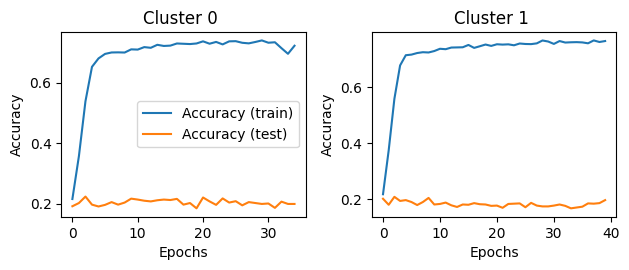

In [450]:
def create_model_plots(history0,history1):
        plt.figure(0)
        plt.subplot(2, 2, 1)
        plt.plot(history0.history['accuracy'], label='Accuracy (train)')
        plt.plot(history0.history['val_accuracy'], label='Accuracy (test)')
        plt.title("Cluster 0 ")
        plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.legend()

        plt.subplot(2, 2, 2)
        plt.plot(history1.history['accuracy'], label='Accuracy (train)')
        plt.plot(history1.history['val_accuracy'], label='Accuracy (test)')
        plt.title("Cluster 1 ")
        plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.tight_layout()
        plt.show()



create_model_plots(cluster0_his,cluster1_his)

In [451]:
#cluster0-cluster1
new_cluster0 = csv[csv['cluster'] ==0]
new_cluster1=csv[csv['cluster'] == 1]

In [452]:
cluster0_null = new_cluster0[new_cluster0['rating'] == 0]
cluster1_null = new_cluster1[new_cluster1['rating'] == 0]


In [453]:
def cluster_clean_data(csv,texts):
    csv
    csv = csv[['summary' ,'rating']]
    csv
    x=texts[0]
    y = csv['rating']

    #clean data
    csv['summary'] =csv['summary'].apply(clean_data)
    csv['removestopwords'] = csv['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



    #create new series('stemmed')
    csv['Stemmed'] = csv['removestopwords'].apply(lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()]))
    csv =csv.drop(columns=['removestopwords'])

    return csv

cluster0_clean = cluster_clean_data(cluster0_null,texts0)
cluster1_clean = cluster_clean_data(cluster1_null,texts1)

/tmp/ipykernel_4123/2876646207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['summary'] =csv['summary'].apply(clean_data)
/tmp/ipykernel_4123/2876646207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['removestopwords'] = csv['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
/tmp/ipykernel_4123/2876646207.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [454]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenize the summary texts
# weight matrix of one embedding for each unique word in summary 
summaries = cluster0_clean["summary"].copy()
input_length0 = texts0.shape[1]
# Tokenize the summary texts
token = Tokenizer()
token.fit_on_texts(summaries)
#len of each unique word in summary 
vocab_size0 = len(token.word_index) + 1 
new_texts0 = token.texts_to_sequences(summaries) # encode to integer each word 
new_texts0 = pad_sequences(new_texts0, padding='post',maxlen=input_length0)



# Tokenize the summary texts
# weight matrix of one embedding for each unique word in summary 
summaries = cluster1_clean["summary"].copy()
input_length1 = texts1.shape[1]
# Tokenize the summary texts
token = Tokenizer()
token.fit_on_texts(summaries)
#len of each unique word in summary 
vocab_size1 = len(token.word_index) + 1 
new_texts1 = token.texts_to_sequences(summaries) # encode to integer each word 
new_texts1 = pad_sequences(new_texts1, padding='post',maxlen=input_length1)


In [455]:
new_df0 = pd.DataFrame()
predict0_x=cluster0_res.predict(new_texts0) 
new_df0=np.argmax(predict0_x,axis=1)
new_df0

89/89 [==============================] - 0s 794us/step


array([10,  5,  9, ...,  6,  8,  5])

In [456]:
new_df1 = pd.DataFrame()
predict1_x=cluster1_res.predict(new_texts1) 
new_df1=np.argmax(predict1_x,axis=1)
new_df1

74/74 [==============================] - 0s 855us/step


array([ 5, 10,  5, ...,  7,  5,  7])

In [457]:
#CONNECT CLUSTERS BACK TO SAME DATAFRAME #PREDICTED RATING
clust0=cluster0_null.drop(columns=['rating'])
clust0['rating']=new_df0

clust1=cluster1_null.drop(columns=['rating'])
clust1['rating']=new_df1

In [458]:
clust1

,cluster,uid,location,age,isbn,book_title,book_author,summary,rating
18640,1,44,"black mountain, north carolina, usa",51.0,042518630X,Purity in Death,J.D. Robb,Eve Dallas must face the impossible: someone h...,5
18641,1,44,"black mountain, north carolina, usa",51.0,0812523873,Proxies,Laura J. Mixon,New millennium has been born in fire. The Sout...,10
18645,1,469,"corona, california, usa",18.0,0674511255,The Last Best Hope of Earth: Abraham Lincoln a...,"Mark E., Jr. Neely",We also see Lincoln&#39;s steadfast dedication...,5
18647,1,602,"forest grove, oregon, usa",23.0,0061080519,The Mist and the Magic (Harper Monogram),Susan Wiggs,Caitlin MacBride wishes on a sunset for her tr...,8
18648,1,938,"calgary, alberta, canada",55.0,0385335881,Shopaholic Takes Manhattan (Summer Display Opp...,Sophie Kinsella,TV financial guru Becky Bloomwood has finally ...,10
...,...,...,...,...,...,...,...,...,...
22574,1,278538,"griswold, iowa, usa",33.0,0440403928,Six-Guns and Shurikens (Teenage Mutant Ninja T...,Dave Morris,Michelangelo finds a genie in a lamp who zaps ...,9
22575,1,278542,"greeneville, tennessee, usa",39.0,0446605409,Plum Island,Nelson DeMille,"Fast-paced and atmospheric, marked by entranci...",8
22577,1,278849,"georgetown, ontario, canada",23.0,0445210214,Mythology 101 (Questar Fantasy),Jody Lynn Nye,Keith Doyle is determined in his campaign to t...,7
22578,1,278849,"georgetown, ontario, canada",23.0,0771012837,"Klondike: The Last Great Gold Rush, 1896-1899",Pierre Berton,The Klondike stampede was a wild interlude in ...,5


In [459]:
csv_new=csv[csv['rating'] != 0 ]
#csv_new =csv_new.append(clust0)

In [460]:
fcsv=clust0.append(csv_new)
final_Csv=clust1.append(fcsv)

/tmp/ipykernel_4123/4038504052.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fcsv=clust0.append(csv_new)
/tmp/ipykernel_4123/4038504052.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_Csv=clust1.append(fcsv)


In [475]:
final_Csv_books = final_Csv[['isbn',"book_title","book_author",'summary']]
final_Csv_ratings=final_Csv[['location','isbn','rating']]
final_Csv_books

,isbn,book_title,book_author,summary
18640,042518630X,Purity in Death,J.D. Robb,Eve Dallas must face the impossible: someone h...
18641,0812523873,Proxies,Laura J. Mixon,New millennium has been born in fire. The Sout...
18645,0674511255,The Last Best Hope of Earth: Abraham Lincoln a...,"Mark E., Jr. Neely",We also see Lincoln&#39;s steadfast dedication...
18647,0061080519,The Mist and the Magic (Harper Monogram),Susan Wiggs,Caitlin MacBride wishes on a sunset for her tr...
18648,0385335881,Shopaholic Takes Manhattan (Summer Display Opp...,Sophie Kinsella,TV financial guru Becky Bloomwood has finally ...
...,...,...,...,...
22568,0440236053,Writ of Execution,Perri O'Shaughnessy,Nina Reilly takes on the case of Jessie Potter...
22569,0688170528,The Pact: A Love Story,Jodi Picoult,It&#39;s rare to find a writer who combines Al...
22571,0971880107,Wild Animus,Rich Shapero,"Wild animus is a search for the primordial, a ..."
22572,0446608262,The Lion's Game,Nelson DeMille,Filled with unrelenting suspense and surprisin...


In [480]:
from upload_elastic import helpers
import csv
import json
es = Elasticsearch(['https://localhost:9200/'], ssl_assert_fingerprint="090d01c3894ea9e5de046d07100f6af34287c8c69955fdc1e9b394ea61b6695f",basic_auth=("elastic", "Xh7dY1eDHw6YqrsH+h+0"))

index = input(str('give a string value for booking upload:'))

def upload_Books(book_index):
    json_str = final_Csv_books.to_json(orient='records')

    json_records = json.loads(json_str)

    index_name = str(book_index)
    es.indices.delete(index=index_name, ignore=[400, 404])
    es.indices.create(index=index_name, ignore=400)   
    action_list = []
    for row in json_records:
        record ={
            '_op_type': 'index',
            '_index': index_name,
            '_source': row
        }
        action_list.append(record)
    helpers.bulk(es, action_list)
    if es.indices.exists(index=book_index):
        print(es.indices.get_alias())
upload_Books(index)

index1 = input(str('give a string value for rating upload:'))

def upload_ratings(rating_index):
    
    json_str = final_Csv_ratings.to_json(orient='records')

    json_records = json.loads(json_str)

    index_name = str(rating_index)
    es.indices.delete(index=index_name, ignore=[400, 404])
    es.indices.create(index=index_name, ignore=400)   
    action_list = []
    for row in json_records:
        record ={
            '_op_type': 'index',
            '_index': index_name,
            '_source': row
        }
        action_list.append(record)
    helpers.bulk(es, action_list)
    if es.indices.exists(index=rating_index):
        print(es.indices.get_alias())     
upload_ratings(index1)


/tmp/ipykernel_4123/2483433039.py:14: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.delete(index=index_name, ignore=[400, 404])
/tmp/ipykernel_4123/2483433039.py:15: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.create(index=index_name, ignore=400)
/tmp/ipykernel_4123/2483433039.py:26: ElasticsearchWarning: this request accesses system indices: [.kibana_security_session_1, .kibana_task_manager_8.5.3_001, .apm-custom-link, .security-profile-8, .apm-agent-configuration, .kibana_8.5.3_001, .tasks, .security-7], but in a future major version, direct access to system indices will be prevented by default
  print(es.indices.get_alias())


{'books_kmeans': {'aliases': {}}, 'ratings_kmeans': {'aliases': {}}, '.kibana_security_session_1': {'aliases': {'.kibana_security_session': {'is_hidden': True}}}, 'newbooks': {'aliases': {}}, 'newratings': {'aliases': {}}, '.kibana_task_manager_8.5.3_001': {'aliases': {'.kibana_task_manager': {'is_hidden': True}, '.kibana_task_manager_8.5.3': {'is_hidden': True}}}, 'books_test': {'aliases': {}}, '.apm-custom-link': {'aliases': {}}, 'rating_anaktisi': {'aliases': {}}, 'ratings': {'aliases': {}}, 'ratings_test': {'aliases': {}}, '.security-profile-8': {'aliases': {'.security-profile': {'is_hidden': True}}}, 'neural_ratings': {'aliases': {}}, 'clara': {'aliases': {}}, 'ratings_kmeans_anaktisi': {'aliases': {}}, 'nebookings': {'aliases': {}}, '.apm-agent-configuration': {'aliases': {}}, 'neural_books': {'aliases': {}}, '.kibana-event-log-8.5.3-000001': {'aliases': {'.kibana-event-log-8.5.3': {'is_write_index': True, 'is_hidden': True}}}, '.kibana_8.5.3_001': {'aliases': {'.kibana': {'is_hi

/tmp/ipykernel_4123/2483433039.py:38: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.delete(index=index_name, ignore=[400, 404])
/tmp/ipykernel_4123/2483433039.py:39: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.create(index=index_name, ignore=400)


{'books_kmeans': {'aliases': {}}, 'ratings_kmeans': {'aliases': {}}, '.kibana_security_session_1': {'aliases': {'.kibana_security_session': {'is_hidden': True}}}, 'newbooks': {'aliases': {}}, 'newratings': {'aliases': {}}, '.kibana_task_manager_8.5.3_001': {'aliases': {'.kibana_task_manager': {'is_hidden': True}, '.kibana_task_manager_8.5.3': {'is_hidden': True}}}, 'books_test': {'aliases': {}}, '.apm-custom-link': {'aliases': {}}, 'rating_anaktisi': {'aliases': {}}, 'ratings': {'aliases': {}}, 'ratings_test': {'aliases': {}}, '.security-profile-8': {'aliases': {'.security-profile': {'is_hidden': True}}}, 'neural_ratings': {'aliases': {}}, 'clara': {'aliases': {}}, 'ratings_kmeans_anaktisi': {'aliases': {}}, 'nebookings': {'aliases': {}}, '.apm-agent-configuration': {'aliases': {}}, 'neural_books': {'aliases': {}}, '.kibana-event-log-8.5.3-000001': {'aliases': {'.kibana-event-log-8.5.3': {'is_write_index': True, 'is_hidden': True}}}, '.kibana_8.5.3_001': {'aliases': {'.kibana': {'is_hi

/tmp/ipykernel_4123/2483433039.py:50: ElasticsearchWarning: this request accesses system indices: [.kibana_security_session_1, .kibana_task_manager_8.5.3_001, .apm-custom-link, .security-profile-8, .apm-agent-configuration, .kibana_8.5.3_001, .tasks, .security-7], but in a future major version, direct access to system indices will be prevented by default
  print(es.indices.get_alias())
